# Barunjit Banerjee

# Quora Question Similarity Project

This project is about predicting whether quora can treat a given question pair to be semantically same. This will
help them in merging the similar questions and thus reducing confusion and redundancy. 

# Importing Libraries

In [177]:
import pandas as pd
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
import re
from gensim import utils
from gensim.models.doc2vec import LabeledSentence
from gensim.models.doc2vec import TaggedDocument
from gensim.models import Doc2Vec
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import accuracy_score
from nltk.tokenize import word_tokenize
from string import punctuation
from sklearn.metrics import jaccard_similarity_score
from sklearn.feature_extraction.text import TfidfVectorizer
#stop_words = stopwords.words('english')

# Importing Stopwords

In [178]:
stop_words = pd.read_csv('stopwords.txt')
stop_words = list(stop_words['x'])

# Importing The Data Set

In [181]:
# Import Data
dfo=pd.read_csv("tpair_train.csv")
 
# Check for null values
dfo[dfo.isnull().any(axis=1)]
 
# Drop rows with null Values
dfo.drop(dfo[dfo.isnull().any(axis=1)].index,inplace=True)

# Generating a Sample From the Data Set

In [182]:
df = dfo.sample(frac = 0.5, random_state=1)
df = df.reset_index()
df.head()

,index,id,qid1,qid2,question1,question2,is_duplicate
0,402502,402502,122648,535990,"Is ""G"" based on real events?","Is ""Enough"" based on real event?",0
1,187257,187257,285418,285419,How did movies like Happy New Year earn 300 cr...,How do senseless movies like DILWALE or HAPPY ...,1
2,29381,29381,54364,54365,What's the best way to tell my crush I like him?,How do I tell a girl I like her?,0
3,24194,24194,45236,45237,If you roll a fair six-sided die and a fair fo...,If you roll a fair six-sided die and a fair fo...,0
4,291941,291941,413461,413462,Can anyone give me list of the scams by Congre...,How do I get total police station list of india?,0


In [183]:
df.shape

(202144, 7)

In [185]:
print(df.question1.head())
print(df.question1.head())

0                               Is G based real events
1       How movies like Happy New Year earn 300 crores
2                      What best way tell crush I like
3    If roll fair sided die fair sided die probabil...
4    Can give list scams Congress government India ...
Name: question1, dtype: object
0                               Is G based real events
1       How movies like Happy New Year earn 300 crores
2                      What best way tell crush I like
3    If roll fair sided die fair sided die probabil...
4    Can give list scams Congress government India ...
Name: question1, dtype: object


In [186]:
qlist = dfo['question1'].append(dfo['question2'], ignore_index = True)
qlist = pd.DataFrame(qlist, columns = ['question'])
qlist.head()

,question
0,What is the step by step guide to invest in sh...
1,What is the story of Kohinoor (Koh-i-Noor) Dia...
2,How can I increase the speed of my internet co...
3,Why am I mentally very lonely? How can I solve...
4,"Which one dissolve in water quikly sugar, salt..."


In [187]:
qlist.shape

(808574, 1)

# Function to Clean Text

In [ ]:
def text_to_wordlist(text, remove_stop_words=True, stem_words=False):
    # Clean the text, with the option to remove stop_words and to stem words.

    # Clean the text
    text = re.sub(r"[^A-Za-z0-9]", " ", text)
    text = re.sub(r"what's", "", text)
    text = re.sub(r"What's", "", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "cannot ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"I'm", "I am", text)
    text = re.sub(r" m ", " am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r"60k", " 60000 ", text)
    text = re.sub(r" e g ", " eg ", text)
    text = re.sub(r" b g ", " bg ", text)
    text = re.sub(r"\0s", "0", text)
    text = re.sub(r" 9 11 ", "911", text)
    text = re.sub(r"e-mail", "email", text)
    text = re.sub(r"\s{2,}", " ", text)
    text = re.sub(r"quikly", "quickly", text)
    text = re.sub(r" usa ", " America ", text)
    text = re.sub(r" USA ", " America ", text)
    text = re.sub(r" u s ", " America ", text)
    text = re.sub(r" uk ", " England ", text)
    text = re.sub(r" UK ", " England ", text)
    text = re.sub(r"india", "India", text)
    text = re.sub(r"switzerland", "Switzerland", text)
    text = re.sub(r"china", "China", text)
    text = re.sub(r"chinese", "Chinese", text) 
    text = re.sub(r"imrovement", "improvement", text)
    text = re.sub(r"intially", "initially", text)
    text = re.sub(r"quora", "Quora", text)
    text = re.sub(r" dms ", "direct messages ", text)  
    text = re.sub(r"demonitization", "demonetization", text) 
    text = re.sub(r"actived", "active", text)
    text = re.sub(r"kms", " kilometers ", text)
    text = re.sub(r"KMs", " kilometers ", text)
    text = re.sub(r" cs ", " computer science ", text) 
    text = re.sub(r" upvotes ", " up votes ", text)
    text = re.sub(r" iPhone ", " phone ", text)
    text = re.sub(r"\0rs ", " rs ", text) 
    text = re.sub(r"calender", "calendar", text)
    text = re.sub(r"ios", "operating system", text)
    text = re.sub(r"gps", "GPS", text)
    text = re.sub(r"gst", "GST", text)
    text = re.sub(r"programing", "programming", text)
    text = re.sub(r"bestfriend", "best friend", text)
    text = re.sub(r"dna", "DNA", text)
    text = re.sub(r"III", "3", text) 
    text = re.sub(r"the US", "America", text)
    text = re.sub(r"Astrology", "astrology", text)
    text = re.sub(r"Method", "method", text)
    text = re.sub(r"Find", "find", text) 
    text = re.sub(r"banglore", "Banglore", text)
    text = re.sub(r" J K ", " JK ", text)
    
    # Remove punctuation from text
    text = ''.join([c for c in text if c not in punctuation])
    
    # Optionally, remove stop words
    if remove_stop_words:
        text = text.split()
        text = [w for w in text if not w in stop_words]
        text = " ".join(text)
    
    # Optionally, shorten words to their stems
    if stem_words:
        text = text.split()
        stemmer = SnowballStemmer('english')
        stemmed_words = [stemmer.stem(word) for word in text]
        text = " ".join(stemmed_words)
    
    # Return a list of words
    return(text)

# Function to calculate the count share of common words

In [188]:
def word_match_share(row):
    
    q1words = {}
    q2words= {}
    #q1 = text_to_wordlist("What is the step by step guide to invest in share market in india?")
    #q2 = text_to_wordlist("What is the step by step guide to invest in share market?")
    for word in str(row['question1']).lower().split():
        if word not in stop_words:
            q1words[word] = 1
    #print(q1words)
    for word in str(row['question2']).lower().split():
        if word not in stop_words:
            q2words[word] = 1
    #print(q2words)
    #print(len(q1words))
    #print(len(q2words))
    if len(q1words) == 0 or len(q2words) == 0:
        # The computer-generated chaff includes a few questions that are nothing but stopwords
        return 0
    shared_words_in_q1 = [w for w in q1words.keys() if w in q2words]
    #print(shared_words_in_q1)
    shared_words_in_q2 = [w for w in q2words.keys() if w in q1words]
    #print(shared_words_in_q2)
    R = (len(shared_words_in_q1) + len(shared_words_in_q2))/(len(q1words) + len(q2words))
    return R

# Function to calculate the TFIDF share of common words

In [189]:
def tfidf_word_match_share(row):
    q1words = {}
    q2words = {}
    #row['question1'] = text_to_wordlist(row['question1'])
    #row['question2'] = text_to_wordlist(row['question2'])
    #q2 = text_to_wordlist("What is the step by step guide to invest in share market?")

    for word in str(row['question1']).lower().split():
        if word not in stop_words:
            q1words[word] = 1
    #print(q1words)
    for word in str(row['question2']).lower().split():
        if word not in stop_words:
            q2words[word] = 1
    #print(q2words)
    if len(q1words) == 0 or len(q2words) == 0:
        # The computer-generated chaff includes a few questions that are nothing but stopwords
        return 0

    shared_weights = [rr[w] for w in q1words.keys() if w in q2words if w in tf.get_feature_names()] + [rr[w] for w in q2words.keys() if w in q1words if w in tf.get_feature_names()]
    #print(shared_weights)
    total_weights = [rr[w] for w in q1words if w in tf.get_feature_names()] + [rr[w] for w in q2words if w in tf.get_feature_names()]
    #print(total_weights)
    if np.sum(total_weights)!= 0:
        R = np.sum(shared_weights) / np.sum(total_weights)
        return(R)
    else:
        return 0

# Cleaning the question pairs

In [ ]:
df.question1 = df.question1.apply(text_to_wordlist,stem_words = False)
df.question2 = df.question2.apply(text_to_wordlist,stem_words = False)

# Corpus for vocabulary creation

In [ ]:
qlist = dfo['question1'].append(dfo['question2'], ignore_index = True)
qlist = pd.DataFrame(qlist, columns = ['question'])
qlist.head()

# Preparing the Tagged Data

In [190]:
tagged_data = [TaggedDocument(words=word_tokenize(_d.lower()), tags=[str(i)]) for i, _d in enumerate(qlist.question)]

# Training the doc2vec Model

In [191]:
max_epochs = 20
vec_size = 300
alpha = 0.025

model = Doc2Vec(vector_size=vec_size,
                alpha=alpha, 
                min_alpha=0.00025,
                min_count=1,
                dm =1)
  
model.build_vocab(tagged_data)

for epoch in range(max_epochs):
    print('iteration {0}'.format(epoch))
    model.train(tagged_data,
                total_examples=model.corpus_count,
                epochs=model.epochs)
    # decrease the learning rate
    model.alpha -= 0.0002
    # fix the learning rate, no decay
    model.min_alpha = model.alpha

model.save("d2v_0.05.model")
print("Model Saved")

iteration 0
iteration 1
iteration 2
iteration 3
iteration 4
iteration 5
iteration 6
iteration 7
iteration 8
iteration 9
iteration 10
iteration 11
iteration 12
iteration 13
iteration 14
iteration 15
iteration 16
iteration 17
iteration 18
iteration 19
Model Saved


In [192]:
model= Doc2Vec.load("d2v_0.05.model")

# Calculating Different Similary Matrix Using Quetion Pair Embeddings

In [193]:
from scipy import spatial
from math import*
from decimal import Decimal

cosine_similarity = lambda x, y: 1 - spatial.distance.cosine(x, y)

def euclidean_distance(x,y):
    return sqrt(sum(pow(a-b,2) for a, b in zip(x, y)))

def manhattan_distance(x,y):
    return sum(abs(a-b) for a,b in zip(x,y))

def nth_root(value, n_root):
    root_value = 1/float(n_root)
    return round (Decimal(value) ** Decimal(root_value),3)
 
def minkowski_distance(x,y,p_value):
    return nth_root(sum(pow(abs(a-b),p_value) for a,b in zip(x, y)),p_value)


score = np.zeros(df.shape[0])
escore = np.zeros(df.shape[0])
mscore = np.zeros(df.shape[0])
minscore = np.zeros(df.shape[0])

for i in range(df.shape[0]):
    q1 = model.infer_vector(word_tokenize(df.loc[:,'question1'][i]))
    q2 = model.infer_vector(word_tokenize(df.loc[:,'question2'][i]))
    #score[i] = cosine_similarity(model.infer_vector(word_tokenize(df.loc[:,'question1'][i])),model.infer_vector(word_tokenize(df.loc[:,'question2'][i])))
    score[i] = cosine_similarity(q1,q2)
    escore[i] = euclidean_distance(q1,q2)
    mscore[i] = manhattan_distance(q1,q2)
    minscore[i] = minkowski_distance(q1,q2,3)
    
print(score)

[ 0.80333608  0.75716186  0.22779022 ... -0.08221667  0.18314494
  0.78266025]


In [194]:
df.head()

,index,id,qid1,qid2,question1,question2,is_duplicate
0,402502,402502,122648,535990,Is G based real events,Is Enough based real event,0
1,187257,187257,285418,285419,How movies like Happy New Year earn 300 crores,How senseless movies like DILWALE HAPPY NEW YE...,1
2,29381,29381,54364,54365,What best way tell crush I like,How I tell girl I like,0
3,24194,24194,45236,45237,If roll fair sided die fair sided die probabil...,If roll fair sided die fair sided die probabil...,0
4,291941,291941,413461,413462,Can give list scams Congress government India ...,How I total police station list India,0


In [195]:
df['cosine_score'] = np.random.randn(df.shape[0])
df['cosine_score'].update(pd.Series(score))

In [196]:
df['euclidean_score'] = np.random.randn(df.shape[0])
df['euclidean_score'].update(pd.Series(escore))

In [197]:
df['manhattan_score'] = np.random.randn(df.shape[0])
df['manhattan_score'].update(pd.Series(mscore))

In [198]:
df['minkowski_score'] = np.random.randn(df.shape[0])
df['minkowski_score'].update(pd.Series(minscore))

In [199]:
df.head()

,index,id,qid1,qid2,question1,question2,is_duplicate,cosine_score,euclidean_score,manhattan_score,minkowski_score
0,402502,402502,122648,535990,Is G based real events,Is Enough based real event,0,0.803336,0.854971,11.931236,0.386
1,187257,187257,285418,285419,How movies like Happy New Year earn 300 crores,How senseless movies like DILWALE HAPPY NEW YE...,1,0.757162,1.522827,21.093546,0.683
2,29381,29381,54364,54365,What best way tell crush I like,How I tell girl I like,0,0.227790,1.556836,21.561154,0.702
3,24194,24194,45236,45237,If roll fair sided die fair sided die probabil...,If roll fair sided die fair sided die probabil...,0,0.277687,2.516365,34.298244,1.153
4,291941,291941,413461,413462,Can give list scams Congress government India ...,How I total police station list India,0,0.384829,1.720771,24.520465,0.767


In [128]:
df_jacard = df.copy()

In [129]:
df_jacard['question1'] = df.question1.apply(text_to_wordlist,stem_words = True)
df_jacard['question2'] = df.question2.apply(text_to_wordlist,stem_words = True)

In [130]:
def get_jaccard_sim(str1, str2): 
    a = set(str1.split()) 
    b = set(str2.split())
    c = a.intersection(b)
    return float(len(c))/(len(a)+len(b)-len(c))

In [131]:
jscore = np.zeros(df.shape[0])
for i in range(df.shape[0]):
    jscore[i] = get_jaccard_sim(df_jacard['question1'][i],df_jacard['question2'][i])

In [132]:
df['jscore'] = np.random.randn(df.shape[0])
df['jscore'].update(pd.Series(jscore))

# Calculating the word share and TFIDF share for common words in the question pairs

In [201]:
df['word_share_score'] = df.apply(word_match_share, axis =1 ,raw=True)

In [76]:
tf = TfidfVectorizer() 
X = tf.fit(qlist['question'])
X = X.transform(qlist['question'])
#print(X)
idf = tf.idf_
rr = dict(zip(tf.get_feature_names(), idf))

In [77]:
df['tfidf_score'] = df.apply(tfidf_word_match_share, axis =1 ,raw=True)

In [134]:
df.head()

,index,id,qid1,qid2,question1,question2,is_duplicate,similarity_score,jscore,nscore,word_share_score,tfidf_score,esimilarity_score,cosine_score,euclidean_score,manhattan_score,minkowski_score
0,402502,402502,122648,535990,Is G based real events,Is Enough based real event,0,0.777502,0.666667,0.000000,1.000000,1.000000,0.554536,0.777502,0.485446,6.927478,0.215
1,187257,187257,285418,285419,How movies like Happy New Year earn 300 crores,How senseless movies like DILWALE HAPPY NEW YE...,1,0.679922,0.571429,0.666667,0.700000,0.676519,0.731736,0.679922,0.923275,12.816620,0.417
2,29381,29381,54364,54365,What best way tell crush I like,How I tell girl I like,0,0.233090,0.333333,0.000000,0.500000,0.501632,0.979126,0.233090,0.983412,13.968207,0.435
3,24194,24194,45236,45237,If roll fair sided die fair sided die probabil...,If roll fair sided die fair sided die probabil...,0,0.747182,0.500000,1.000000,0.625000,0.669641,0.366140,0.747182,0.403413,5.630882,0.181
4,291941,291941,413461,413462,Can give list scams Congress government India ...,How I total police station list India,0,0.287008,0.214286,0.500000,0.428571,0.439360,0.706285,0.287008,0.884763,12.623972,0.395


In [204]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from  sklearn.preprocessing  import PolynomialFeatures
from  sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.svm import SVC, LinearSVC
from sklearn.model_selection import GridSearchCV
import datetime 
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn import tree

In [140]:
# Final data to be feed to the models
dffinal = df[['id','cosine_score','jscore','word_share_score','tfidf_score','euclidean_score',
             'manhattan_score','minkowski_score','is_duplicate']]

In [207]:
y = dffinal['is_duplicate']
X = dffinal.drop(columns = ['is_duplicate'])

In [210]:
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True,test_size=0.3,random_state= 30)

In [211]:
X_train.shape

(141500, 6)

In [212]:
X_test.shape

(60644, 6)

# Logistic Regression Algorithm

In [433]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(penalty = 'l1', C = 0.1)
parameters = dict(penalty=('l1','l2'),C =(0.01, 0.1, 1, 10, 100))
classifier.fit(X_train, y_train.values.reshape((-1,)))

C:\Users\barun\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [385]:
"""from sklearn.model_selection import GridSearchCV
import time

parameters = dict(penalty=('l1','l2'),C =(0.01, 0.1, 1, 10, 100, 1000))

grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           n_jobs = -1)

grid_train = grid_search.fit(X_train, y_train.values.reshape((-1,)))
train_score = grid_train.cv_results_['mean_test_score']
print(train_score)

print(grid_train.best_params_)

y_predict = grid_train.predict(X_test)

print('Test Accuracy Score: %.2f '%metrics.accuracy_score(y_test, y_pred))"""

C:\Users\barun\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[0.66327208 0.62994346 0.66443816 0.62994346 0.66410601 0.62994346
 0.66440989 0.62994346 0.66444523 0.62994346 0.66368905 0.62994346]
{'C': 100, 'penalty': 'l1'}
Test Accuracy Score: 0.67 


In [434]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(penalty = 'l1', C = 100)
parameters = dict(penalty=('l1','l2'),C =(0.01, 0.1, 1, 10, 100))
classifier.fit(X_train, y_train.values.reshape((-1,)))

C:\Users\barun\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [435]:
y_pred = classifier.predict(X_test)
classifier.score(X_test,y_test)

0.6632478068728975

In [436]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
cm = confusion_matrix(y_test, y_pred)
print('Accuracy: ' + str(accuracy_score(y_test, y_pred)))
print('Precision: '+ str(precision_score(y_test, y_pred))) # tp / (tp + fp)
print('Recall: ' + str(recall_score(y_test, y_pred))) # tp / (tp + fn)
print(('F1 Score: ' + str(f1_score(y_test, y_pred))))

Accuracy: 0.6632478068728975
Precision: 0.5519420884879261
Recall: 0.45723875587379725
F1 Score: 0.5001468572547484


Test Data Accuracy: 0.6632


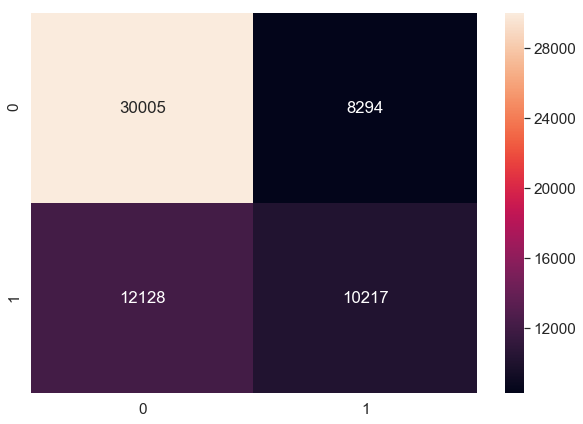

In [439]:
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True, fmt='g')
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test, y_pred))

In [388]:
print('Test Accuracy Score: %.2f '%metrics.accuracy_score(y_test, y_pred))

Test Accuracy Score: 0.67 


In [214]:
y_pred = classifier.predict(X_test)
classifier.score(X_test,y_test)

0.6636435591319834

In [437]:
# calculate the percentage of ones
# because y_test only contains ones and zeros, we can simply calculate the mean = percentage of ones
y_test.mean()
# calculate the percentage of zeros
print(1 - y_test.mean())

0.6315381571136469


In [438]:
# save confusion matrix and slice into four pieces
confusion = metrics.confusion_matrix(y_test, y_pred)
print(confusion)
#[row, column]
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

[[30005  8294]
 [12128 10217]]


In [440]:
# use float to perform true division, not integer division
print((TP + TN) / float(TP + TN + FP + FN))
print(metrics.accuracy_score(y_test, y_pred))

0.6632478068728975
0.6632478068728975


In [441]:
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print(classification_error)
print(1 - metrics.accuracy_score(y_test, y_pred))

0.3367521931271024
0.3367521931271025


In [442]:
sensitivity = TP / float(FN + TP)
print(sensitivity)
print(metrics.recall_score(y_test, y_pred))

0.45723875587379725
0.45723875587379725


In [443]:
specificity = TN / (TN + FP)
print(specificity)

0.7834408209091621


In [444]:
false_positive_rate = FP / float(TN + FP)
print(false_positive_rate)
print(1 - specificity)

0.21655917909083788
0.21655917909083788


In [445]:
precision = TP / float(TP + FP)
print(precision)
print(metrics.precision_score(y_test, y_pred))

0.5519420884879261
0.5519420884879261


In [446]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.78      0.75     38299
           1       0.55      0.46      0.50     22345

   micro avg       0.66      0.66      0.66     60644
   macro avg       0.63      0.62      0.62     60644
weighted avg       0.65      0.66      0.66     60644



# Random Forest Algorithm

In [401]:
from sklearn.ensemble import RandomForestClassifier
classifier_random = RandomForestClassifier(n_estimators=500, max_leaf_nodes=30, n_jobs=-1, random_state=42)
parameters = dict(n_estimators = (100,200,300,400,500,800,1000), max_leaf_nodes = (10,15,20,25,30))

In [402]:
""""grid_search = GridSearchCV(estimator = classifier_random,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           n_jobs = -1)

grid_train = grid_search.fit(X_train,y_train.values.reshape((-1,)))

train_score = grid_train.cv_results_['mean_test_score']

print(grid_train.best_params_)

y_predict = grid_train.predict(X_test)
print('Test Accuracy Score: %.2f '%metrics.accuracy_score(y_test, y_pred))"""

{'max_leaf_nodes': 30, 'n_estimators': 500}
Test Accuracy Score: 0.66 


In [404]:
classifier_random = RandomForestClassifier(n_estimators=500, max_leaf_nodes=30, n_jobs=-1, random_state=42)

In [405]:
classifier_random.fit(X_train, y_train.values.reshape((-1,)))

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=30,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [406]:
y_pred = classifier_random.predict(X_test)
classifier_random.score(X_test,y_test)

0.6874546533869798

In [407]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
cm = confusion_matrix(y_test, y_pred)
print('Accuracy: ' + str(accuracy_score(y_test, y_pred)))
print('Precision: '+ str(precision_score(y_test, y_pred))) # tp / (tp + fp)
print('Recall: ' + str(recall_score(y_test, y_pred))) # tp / (tp + fn)
print(('F1 Score: ' + str(f1_score(y_test, y_pred))))

Accuracy: 0.6874546533869798
Precision: 0.5863157358855572
Recall: 0.5154173193108078
F1 Score: 0.5485853100885968


Test Data Accuracy: 0.6875


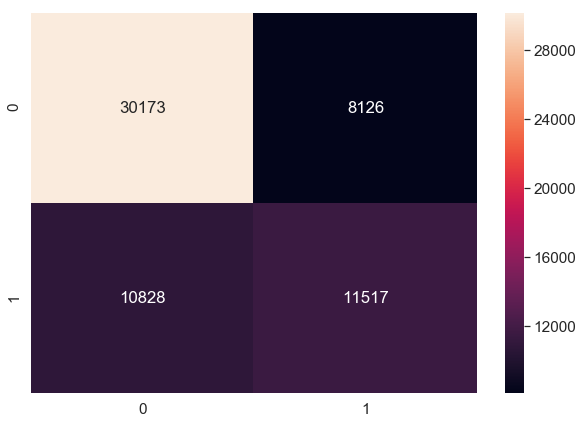

In [408]:
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True, fmt='g')
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test, y_pred))

In [409]:
# calculate accuracy
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred))

0.6874546533869798


In [410]:
# calculate the percentage of ones
# because y_test only contains ones and zeros, we can simply calculate the mean = percentage of ones
y_test.mean()
# calculate the percentage of zeros
print(1 - y_test.mean())

0.6315381571136469


In [411]:
# save confusion matrix and slice into four pieces
confusion = metrics.confusion_matrix(y_test, y_pred)
print(confusion)
#[row, column]
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

[[30173  8126]
 [10828 11517]]


Classification Accuracy: Overall, how often is the classifier correct?

In [412]:
# use float to perform true division, not integer division
print((TP + TN) / float(TP + TN + FP + FN))
print(metrics.accuracy_score(y_test, y_pred))

0.6874546533869798
0.6874546533869798


Classification Error/Misclassification Rate : Overall, how often is the classifier incorrect?

In [413]:
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print(classification_error)
print(1 - metrics.accuracy_score(y_test, y_pred))

0.31254534661302025
0.31254534661302025


Sensitivity: When the actual value is positive, how often is the prediction correct?

In [414]:
sensitivity = TP / float(FN + TP)
print(sensitivity)
print(metrics.recall_score(y_test, y_pred))

0.5154173193108078
0.5154173193108078


Specificity: When the actual value is negative, how often is the prediction correct?

In [415]:
specificity = TN / (TN + FP)
print(specificity)

0.7878273584166688


False Positive Rate: When the actual value is negative, how often is the prediction incorrect?

In [416]:
false_positive_rate = FP / float(TN + FP)
print(false_positive_rate)
print(1 - specificity)

0.21217264158333116
0.21217264158333116


Precision: When a positive value is predicted, how often is the prediction correct?

In [417]:
precision = TP / float(TP + FP)
print(precision)
print(metrics.precision_score(y_test, y_pred))

0.5863157358855572
0.5863157358855572


In [418]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.79      0.76     38299
           1       0.59      0.52      0.55     22345

   micro avg       0.69      0.69      0.69     60644
   macro avg       0.66      0.65      0.65     60644
weighted avg       0.68      0.69      0.68     60644



# XGBOOST ALGORITHM

In [419]:
import xgboost as xgb

dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

C:\Users\barun\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


In [420]:
param = {
    'max_depth': 8,  # the maximum depth of each tree
    'eta': 0.05,  # the training step for each iteration
    'silent': 1,  # logging mode - quiet
    'objective': 'multi:softprob',  # error evaluation for multiclass training
    'num_class': 2} 

num_round = 50

In [421]:
bst = xgb.train(param, dtrain, num_round)

In [422]:
import numpy as np
preds = bst.predict(dtest)
y_pred = np.asarray([np.argmax(line) for line in preds])

In [423]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
cm = confusion_matrix(y_test, y_pred)
print('Accuracy: ' + str(accuracy_score(y_test, y_pred)))
print('Precision: '+ str(precision_score(y_test, y_pred))) # tp / (tp + fp)
print('Recall: ' + str(recall_score(y_test, y_pred))) # tp / (tp + fn)
print(('F1 Score: ' + str(f1_score(y_test, y_pred))))

Accuracy: 0.6952707605039246
Precision: 0.5745189526857671
Recall: 0.6667710897292459
F1 Score: 0.617216951820705


Test Data Accuracy: 0.6953


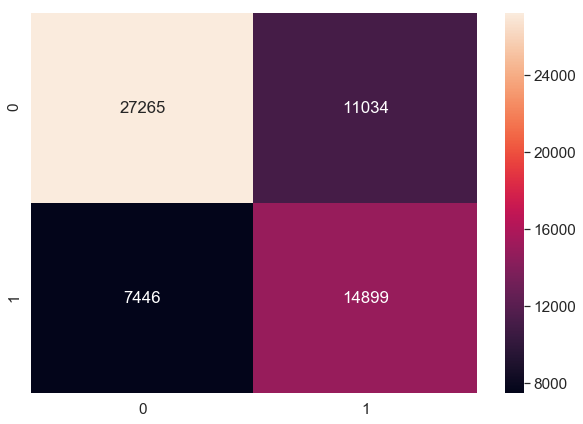

In [424]:
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True, fmt='g')
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test, y_pred))

In [425]:
# save confusion matrix and slice into four pieces
confusion = metrics.confusion_matrix(y_test, y_pred)
print(confusion)
#[row, column]
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

[[27265 11034]
 [ 7446 14899]]


Classification Accuracy: Overall, how often is the classifier correct?

In [426]:
# use float to perform true division, not integer division
print((TP + TN) / float(TP + TN + FP + FN))
print(metrics.accuracy_score(y_test, y_pred))

0.6952707605039246
0.6952707605039246


Classification Error/Misclassification Rate : Overall, how often is the classifier incorrect?

In [427]:
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print(classification_error)
print(1 - metrics.accuracy_score(y_test, y_pred))

0.30472923949607544
0.30472923949607544


Sensitivity: When the actual value is positive, how often is the prediction correct?

In [428]:
sensitivity = TP / float(FN + TP)
print(sensitivity)
print(metrics.recall_score(y_test, y_pred))

0.6667710897292459
0.6667710897292459


Specificity: When the actual value is negative, how often is the prediction correct?

In [429]:
specificity = TN / (TN + FP)
print(specificity)

0.711898482989112


False Positive Rate: When the actual value is negative, how often is the prediction incorrect?


In [430]:
false_positive_rate = FP / float(TN + FP)
print(false_positive_rate)
print(1 - specificity)

0.288101517010888
0.28810151701088804


Precision: When a positive value is predicted, how often is the prediction correct?

In [431]:
precision = TP / float(TP + FP)
print(precision)
print(metrics.precision_score(y_test, y_pred))

0.5745189526857671
0.5745189526857671


In [432]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.71      0.75     38299
           1       0.57      0.67      0.62     22345

   micro avg       0.70      0.70      0.70     60644
   macro avg       0.68      0.69      0.68     60644
weighted avg       0.71      0.70      0.70     60644



# MaLSTM Model

MaLSTM Architecture :

<img src="MaLSTM Architecture.jpg">

<img src="MaLSTM Output.jpg">

MaLSTM Accuracy : around 80%

# Conclusion

MaLSTM Model gives the best accuracy among all the models used.But we need to understand better the business objective of solving this problem so that the correct measure to evaluate the model peformance can be concluded.